In [1]:
#import libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [2]:
#Load the loan information 
loanInfo = pd.read_csv('loan.csv')

In [3]:
# setting up pandas dispaly option to view the data's properly using describe and info command
pd.options.display.max_rows = 300
pd.options.display.max_columns = 111
pd.options.display.max_info_columns = 111
pd.options.display.float_format = '{:.2f}'.format

In [4]:
#Analysis and understanding the coulmns
loanInfo.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00            0.00   
25%         167.02    40404.00     8.17         0.00            0.00   
50%         280.22    59000.00    13.40         0.00            1.00   
75%         430.78    82300.00    18.60         0.00            1.00   
max        1305.19  6000000.00    29.99        11.00            8.00   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
count                14035.00                 2786.00  39717.00 39717.00   
mean                    35.90                   69.70      9.29     0.06   
std                     22.02                   43.82      4.40     0.24   
min                      0.00                    0.00      2.00     0.00   
25%                     18.00                   22.00      6.00     0.00   
50%                     34.00                   90.00      9.00     0.00   
75%                     52.00                  104.00     12.00     0.00   
max                    120.00                  129.00     44.00     4.00   

       revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count   39717.00   39717.00   39717.00       39717.00     39717.00   
mean    13382.53      22.09      51.23          50.99     12153.60   
std     15885.02      11.40     375.17         373.82      9042.04   
min         0.00       2.00       0.00           0.00         0.00   
25%      3703.00      13.00       0.00           0.00      5576.93   
50%      8850.00      20.00       0.00           0.00      9899.64   
75%     17058.00      29.00       0.00           0.00     16534.43   
max    149588.00      90.00    6311.47        6307.37     58563.68   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count         39717.00         39717.00       39717.00            39717.00   
mean          11567.15          9793.35        2263.66                1.36   
std            8942.67          7065.52        2608.11                7.29   
min               0.00             0.00           0.00                0.00   
25%            5112.31          4600.00         662.18                0.00   
50%            9287.15          8000.00        1348.91                0.00   
75%           15798.81         13653.26        2833.40                0.00   
max           58563.68         35000.02       23563.68              180.20   

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count    39717.00                 39717.00         39717.00   
mean        95.22                    12.41          2678.83   
std        688.74                   148.67          4447.14   
min          0.00                     0.00             0.00   
25%          0.00                     0.00           218.68   
50%          0.00                     0.00           546.14   
75%          0.00                     0.00          3293.16   
max      29623.35                  7002.19         36115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
count                    39661.00                 

In [5]:
loanInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Detecting and Treating missing values

In [6]:
# define method to calculate missing value in percentage
def calculate_missing_value_in_percentage(loans):
    return round(100*(loans.isnull().sum()/len(loans.index)), 2);

In [7]:
#calculate percentage of missing value
na_columns = calculate_missing_value_in_percentage(loanInfo)
print(na_columns)

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [8]:
# finding no columns that are completely empty
na_columns.loc[na_columns ==100].shape

(54,)

In [9]:
# finding columns that are completely empty
na_column_list = na_columns.loc[na_columns ==100].index.tolist()
print(na_column_list)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [10]:
# define method to remove columns
def remove_coulmns(columns):
    return loanInfo.drop(columns, axis=1, errors='ignore')

In [11]:
# removing columns that are completey NA, which will not help our analysis 
print("Shape before removing empty columns".format(),loanInfo.shape)
loanInfo = remove_coulmns(na_column_list)
print("Shape After removing empty columns".format(),loanInfo.shape)

Shape before removing empty columns (39717, 111)
Shape After removing empty columns (39717, 57)


In [12]:
#Calculate missing value in percentage
calculate_missing_value_in_percentage(loanInfo)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [13]:
loanInfo.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [14]:
# dropping columns that has one nunique values, because that will not have impcat on our analysis
drop_columns = ['tax_liens','delinq_amnt','chargeoff_within_12_mths', 'acc_now_delinq', 
                  'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan']

loanInfo = remove_coulmns(drop_columns)

##### tax_liens
    all the values in the column is 0.00, so it can be removed.
##### delinq_amnt 
    all the values in the column is 0, so it can be removed.
##### chargeoff_within_12_mths 
    all the values in the column is either 0 or NaN, so it can be removed.
##### acc_now_delinq
    all the values in the column is 0, so it can be removed.
##### application_type
    all the values in the column is INDIVIDUAL, so it can be removed.
##### policy_code
    all the values in the column is 0, so it can be removed.
##### collections_12_mths_ex_med
    all the values in the column is either 0 or NaN, so it can be removed.
##### initial_list_status
    all the values in the column is 'f', so it can be removed.
##### pymnt_plan
    all the values in the column is 'n', so it can be removed.

In [15]:
print("shape after removing above columns", loanInfo.shape)

shape after removing above columns (39717, 48)


In [16]:
customer_behaviour_variables = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc,pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                            'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']
loanInfo = remove_coulmns(customer_behaviour_variables)
print("shape after removing above columns", loanInfo.shape)

shape after removing above columns (39717, 30)


##### delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type

Above variables are customer behaviour variables, which is related to loan that are approved.

So removing those columns, which will not have impact on analysis


In [17]:
na_columns = calculate_missing_value_in_percentage(loanInfo)
print(na_columns)

id                        0.00
member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 6.19
emp_length                2.71
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
url                       0.00
desc                     32.58
purpose                   0.00
title                     0.03
zip_code                  0.00
addr_state                0.00
dti                       0.00
mths_since_last_delinq   64.66
mths_since_last_record   92.99
open_acc                  0.00
pub_rec                   0.00
next_pymnt_d             97.13
pub_rec_bankruptcies      1.75
dtype: float64


In [18]:
# finding and removing the columns more than 50 percent
na_column_list = na_columns.loc[na_columns >=50].index.tolist()
loanInfo = remove_coulmns(na_column_list)

In [19]:
print(calculate_missing_value_in_percentage(loanInfo))

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               6.19
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
url                     0.00
desc                   32.58
purpose                 0.00
title                   0.03
zip_code                0.00
addr_state              0.00
dti                     0.00
open_acc                0.00
pub_rec                 0.00
pub_rec_bankruptcies    1.75
dtype: float64


In [20]:
print("describe pub_rec_bankruptcies: \n", loanInfo.pub_rec_bankruptcies.describe())
print("unique value count of emp_length: \n", loanInfo.emp_length.value_counts())
print("describe emp_title: \n", loanInfo.emp_title.describe())
print("unique value of house ownership: \n", loanInfo.home_ownership.value_counts())

describe pub_rec_bankruptcies: 
 count   39020.00
mean        0.04
std         0.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64
unique value count of emp_length: 
 10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
describe emp_title: 
 count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object
unique value of house ownership: 
 RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


In [21]:
#drop columns na in "emp_title"
drop_coulmns_2 = ['emp_title','url','title','member_id','zip_code','desc']
loanInfo = remove_coulmns(drop_coulmns_2)

#Fill na with 10+ years for "emp_length"
loanInfo.emp_length = loanInfo.emp_length.fillna('10+ years')

#Fill na with 0 for pub_rec_bankruptcies 
loanInfo.pub_rec_bankruptcies = loanInfo.pub_rec_bankruptcies.fillna(0)

loanInfo = loanInfo[loanInfo['home_ownership'] != 'NONE']

##### emp_title,url,title,member_id,zip_code,desc removed columns which will not help our analysis for given problem statement

replaced na value with '10+ years' of emp_length, which is frequently used.
replaced na value with '0' of pub_rec_bankruptcies, which is median.


In [22]:
loanInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39714 non-null  int64  
 1   loan_amnt             39714 non-null  int64  
 2   funded_amnt           39714 non-null  int64  
 3   funded_amnt_inv       39714 non-null  float64
 4   term                  39714 non-null  object 
 5   int_rate              39714 non-null  object 
 6   installment           39714 non-null  float64
 7   grade                 39714 non-null  object 
 8   sub_grade             39714 non-null  object 
 9   emp_length            39714 non-null  object 
 10  home_ownership        39714 non-null  object 
 11  annual_inc            39714 non-null  float64
 12  verification_status   39714 non-null  object 
 13  issue_d               39714 non-null  object 
 14  loan_status           39714 non-null  object 
 15  purpose            

##### Formating the data and coverting data to proper data type

In [23]:
# removing % from int_rate
loanInfo.int_rate = loanInfo.int_rate.str.strip("%")
loanInfo.int_rate = loanInfo.int_rate.apply(lambda x : round(float(x),2))


# coverting to date type and derving month and year column for further analysis 
loanInfo.issue_d = pd.to_datetime(loanInfo.issue_d, format= '%b-%y')
loanInfo['issue_year'] = loanInfo.issue_d.apply(lambda x : int(x.year))
loanInfo['issue_month'] = loanInfo.issue_d.apply(lambda x : int(x.month))

In [24]:
print(loanInfo.dtypes)
print("\nShape of data set after cleaning :",loanInfo.shape)

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
open_acc                         int64
pub_rec                          int64
pub_rec_bankruptcies           float64
issue_year                       int64
issue_month                      int64
dtype: object

Shape of data set after cleaning : (39714, 23)


##### Finally we have 23 columns for our analysis..

### Detecting and Treating outliers

In [25]:
#defining outlier_treatment method, that can used to rermove outliers
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [26]:
loanInfo.shape

(39714, 23)

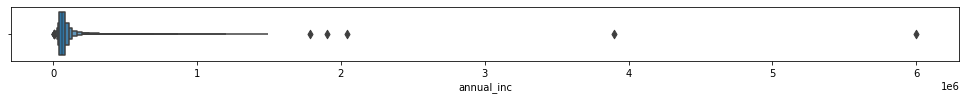

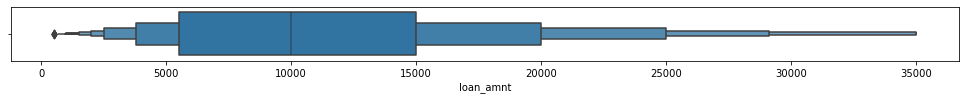

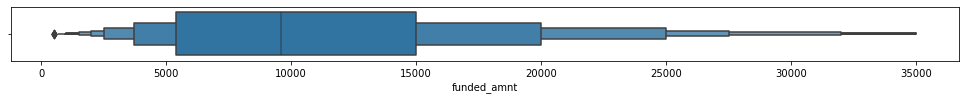

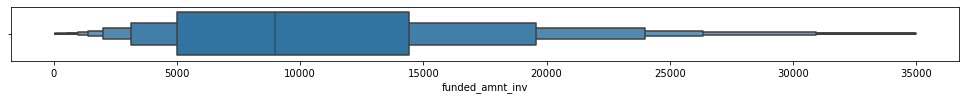

In [27]:
df1=loanInfo.loc[:,['annual_inc','loan_amnt','funded_amnt','funded_amnt_inv']]
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxenplot(data=df1, x=column)

In [28]:
countGroupByLoanStatus = loanInfo.groupby('loan_status')['loan_status'].count().sort_values(ascending = False)
print(countGroupByLoanStatus)

loan_status
Fully Paid     32947
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [29]:
countGroupByLoanStatus['Charged Off']/countGroupByLoanStatus['Fully Paid']

0.17078944972228124

Desciribe Annual income:  count     39714.00
mean      68968.04
std       63795.04
min        4000.00
25%       40404.50
50%       59000.00
75%       82299.00
max     6000000.00
Name: annual_inc, dtype: float64
Annual income skewness:  30.949704552753673


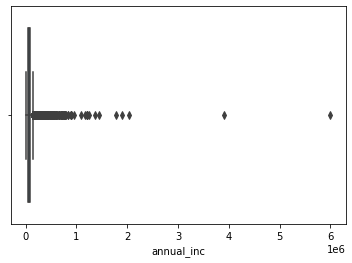

In [30]:
print("Desciribe Annual income: ", loanInfo.annual_inc.describe())
sns.boxplot(loanInfo.annual_inc)
print("Annual income skewness: ",loanInfo.annual_inc.skew())

<AxesSubplot:ylabel='Density'>

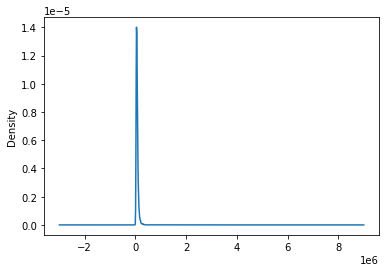

In [31]:
loanInfo.annual_inc.plot(kind='kde')

In [32]:
l,u = outlier_treatment(loanInfo.annual_inc)

In [33]:
loanInfo.drop(loanInfo[ (loanInfo.annual_inc > u) | (loanInfo.annual_inc < l) ].index , inplace=True)

Desciribe Annual income after treating outliers:  count    37871.00
mean     61358.50
std      28208.28
min       4000.00
25%      40000.00
50%      56160.00
75%      78000.00
max     145008.00
Name: annual_inc, dtype: float64
Annual income skewness  after treating outliers:  0.7065636535705603


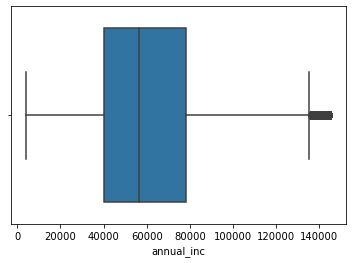

In [34]:
print("Desciribe Annual income after treating outliers: ", loanInfo.annual_inc.describe())
sns.boxplot(loanInfo.annual_inc)
print("Annual income skewness  after treating outliers: ",loanInfo.annual_inc.skew())

<AxesSubplot:ylabel='Density'>

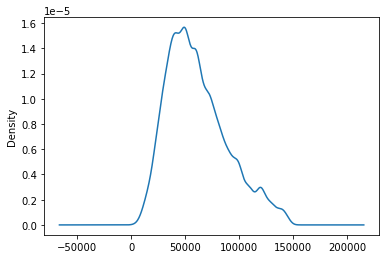

In [35]:
loanInfo.annual_inc.plot(kind='kde')

In [36]:
loanInfo.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000          4975.00   36 months     10.65   
1  1077430       2500         2500          2500.00   60 months     15.27   
2  1077175       2400         2400          2400.00   36 months     15.96   
3  1076863      10000        10000         10000.00   36 months     13.49   
4  1075358       3000         3000          3000.00   60 months     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
4        67.79     B        B5     1 year           RENT    80000.00   

  verification_status    issue_d  loan_status         purpose addr_state  \
0            Verified 2011-12-01   Fully Paid     credit_card         AZ   
1     Source Verified 2011-12-01  Charged Off             car         GA   
2        Not Verified 2011-12-01   Fully Paid  small_business         IL   
3     Source Verified 2011-12-01   Fully Paid           other         CA   
4     Source Verified 2011-12-01      Current           other         OR   

    dti  open_acc  pub_rec  pub_rec_bankruptcies  issue_year  issue_month  
0 27.65         3        0                  0.00        2011           12  
1  1.00         3        0                  0.00        2011           12  
2  8.72         2        0                  0.00        2011           12  
3 20.00        10        0                  0.00        2011           12  
4 17.94        15        0                  0.00        2011           12

## DATA ANALYSIS

In [37]:
#before starting our analysis we required only data related 'Fully Paid' & 'Charged off'. 'current' status will not help us in finding customer crediblity.
newLoanInfo = loanInfo[loanInfo.loan_status.isin(['Fully Paid','Charged Off'])]

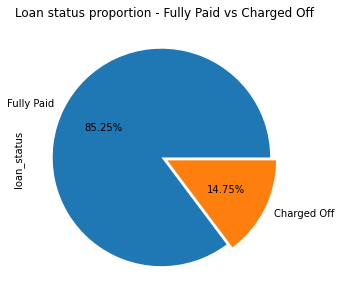

In [38]:
#ploted pie chart to find ratio between 'Fully Paid' & 'Charged off
fig, ax = plt.subplots(figsize =(15, 5))

newLoanInfo.loan_status.value_counts().plot.pie(autopct="%.2f%%",explode=[0.03]*2)
ax.set_title("Loan status proportion - Fully Paid vs Charged Off")
plt.show()

#### From above graph, 85.25 % applicant has fully paid and 14.75% applicant are Charged off.

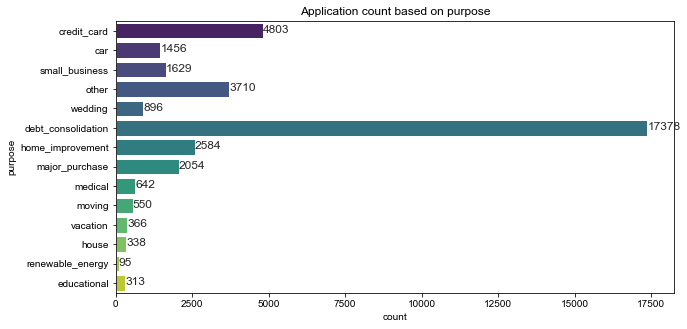

In [39]:
plt.figure(figsize=(10,5))
plt.title('Application count based on purpose')
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=newLoanInfo.purpose, data=newLoanInfo,palette='viridis')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_width()), (p.get_width(), p.get_y()+0.50))

#### From above graph, debt_consolidation is the most purpose of loan application 

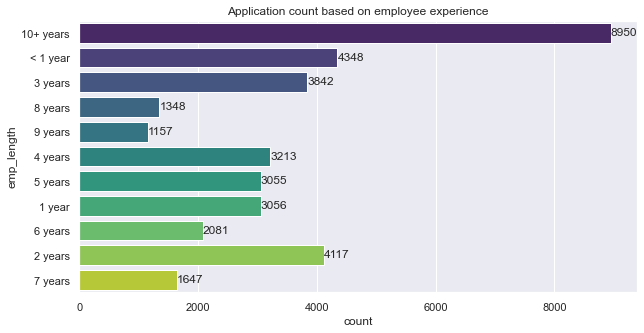

In [40]:
plt.figure(figsize=(10,5))
plt.title('Application count based on employee experience')
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=newLoanInfo.emp_length, data=newLoanInfo,palette='viridis')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_width()), (p.get_width(), p.get_y()+0.50))

#### From above graph, most loan applicants have 10+years of experience

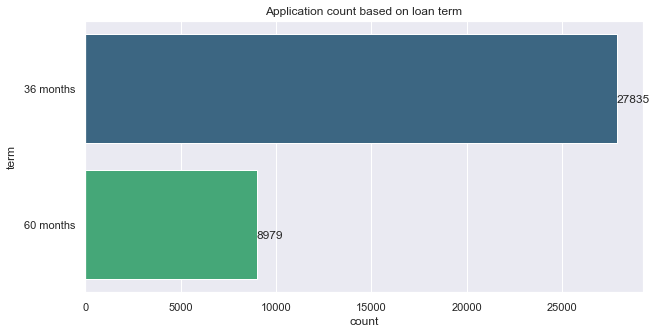

In [41]:
plt.figure(figsize=(10,5))
plt.title('Application count based on loan term')
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=newLoanInfo.term, data=newLoanInfo,palette='viridis')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_width()), (p.get_width(), p.get_y()+0.50))

#### From above graph, most have applied for 36 months term loan.

In [42]:
df = newLoanInfo.select_dtypes(exclude=['object','datetime64'])

In [43]:
correlation_matrix = df.corr()
correlation_matrix

id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
id                    1.00       0.12         0.13             0.23      0.05   
loan_amnt             0.12       1.00         0.98             0.94      0.29   
funded_amnt           0.13       0.98         1.00             0.95      0.30   
funded_amnt_inv       0.23       0.94         0.95             1.00      0.29   
int_rate              0.05       0.29         0.30             0.29      1.00   
installment           0.07       0.93         0.96             0.90      0.27   
annual_inc            0.03       0.40         0.40             0.38      0.05   
dti                   0.09       0.09         0.09             0.10      0.11   
open_acc              0.02       0.17         0.17             0.15     -0.01   
pub_rec              -0.02      -0.04        -0.05            -0.05      0.10   
pub_rec_bankruptcies  0.00      -0.03        -0.03            -0.03      0.09   
issue_year            0.85       0.10         0.12             0.25      0.03   
issue_month           0.39       0.05         0.04             0.07      0.03   

                      installment  annual_inc   dti  open_acc  pub_rec  \
id                           0.07        0.03  0.09      0.02    -0.02   
loan_amnt                    0.93        0.40  0.09      0.17    -0.04   
funded_amnt                  0.96        0.40  0.09      0.17    -0.05   
funded_amnt_inv              0.90        0.38  0.10      0.15    -0.05   
int_rate                     0.27        0.05  0.11     -0.01     0.10   
installment                  1.00        0.40  0.08      0.16    -0.04   
annual_inc                   0.40        1.00 -0.08      0.26    -0.01   
dti                          0.08       -0.08  1.00      0.30    -0.01   
open_acc                     0.16        0.26  0.30      1.00     0.00   
pub_rec                     -0.04       -0.01 -0.01      0.00     1.00   
pub_rec_bankruptcies        -0.03       -0.01  0.01      0.01     0.84   
issue_year                   0.05        0.04  0.09      0.01    -0.00   
issue_month                  0.03        0.01  0.02      0.00    -0.02   

                      pub_rec_bankruptcies  issue_year  issue_month  
id                                    0.00        0.85         0.39  
loan_amnt                            -0.03        0.10         0.05  
funded_amnt                          -0.03        0.12         0.04  
funded_amnt_inv                      -0.03        0.25         0.07  
int_rate                              0.09        0.03         0.03  
installment                          -0.03        0.05         0.03  
annual_inc                           -0.01        0.04         0.01  
dti                                   0.01        0.09         0.02  
open_acc                              0.01        0.01         0.00  
pub_rec                               0.84       -0.00        -0.02  
pub_rec_bankruptcies                  1.00        0.01        -0.02  
issue_year                            0.01        1.00        -0.03  
issue_month                          -0.02       -0.03         1.00

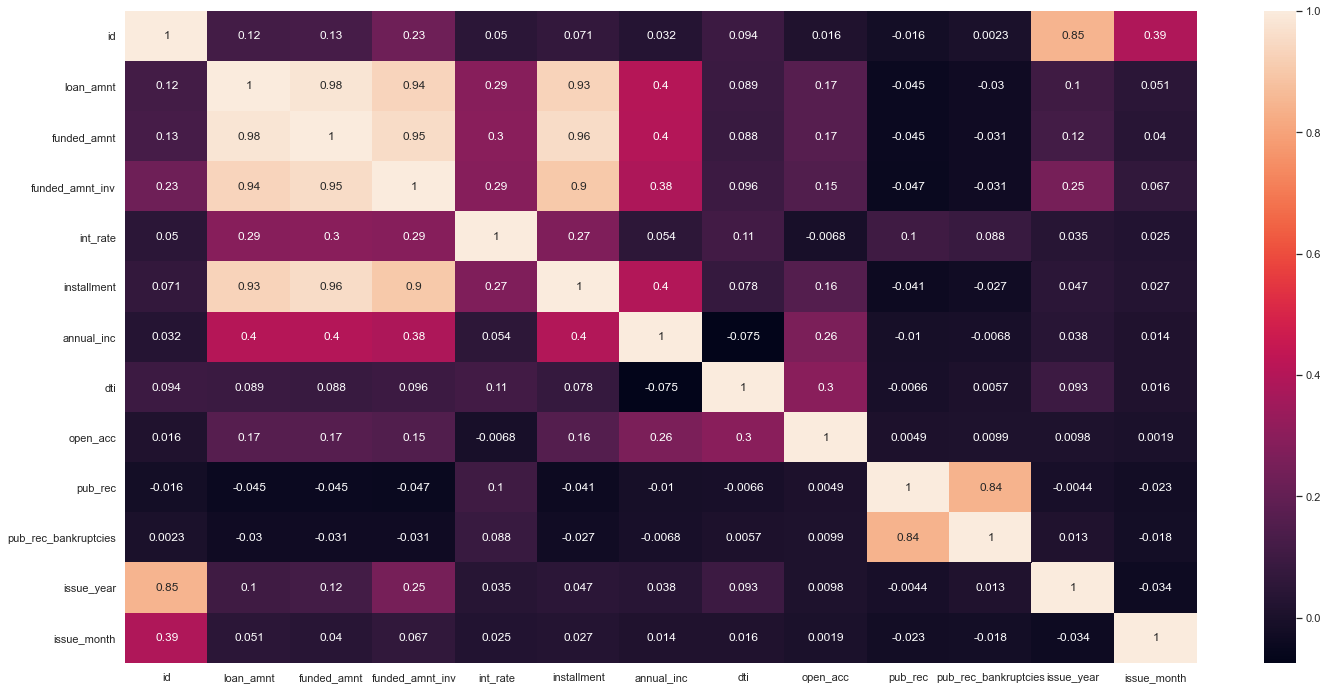

In [44]:
plt.figure(figsize = (24,12))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

#### From above correlation matrix,

* Loan amount -- the amount applied by potential borrower <br>
* funded amount  -- the amount approved or recommended by Lending Club <br>
* funded amount invested -- the amount funded by investors <br>

1. we came know loan amount, funded amount and funded amount invested are highly correlated to each other. This means most of application are approved for same amount as they applied by borrower.

* pub_rec -- Number of derogatory public records
* pub_rec_bankruptcies -- Number of public record bankruptcies

2. pub_rec and pub_rec_bankruptcies are highly correlated each other, which means people who has public derogatory records might fall in bankruptcies.

* dti - debt-to-income ratio
* annual_inc - Annual Income

3. annual_income and dti are negatively correlated to each other, which means people who have high income will have less dti and vice versa.

* int_rate -- intrest rate
* installment -- no of installments for loan applied

4. int_rate and installment are slightly correlated, which means higher the instalments higher the rate of interset.


<Figure size 2160x1440 with 0 Axes>

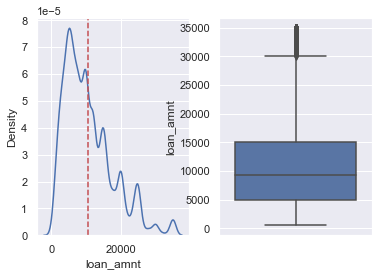

In [45]:
sns.set()
plt.figure(figsize=(30,20))
fig, ax = plt.subplots(1, 2)
mean = newLoanInfo.loan_amnt.mean()
sns.kdeplot(data=newLoanInfo, x=newLoanInfo.loan_amnt, ax=ax[0])
ax[0].axvline(mean, color='r', linestyle='--')
sns.boxplot(y=newLoanInfo.loan_amnt, data=newLoanInfo, ax=ax[1])
plt.show()

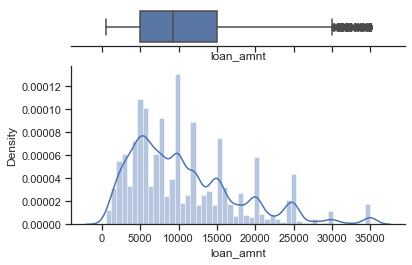

In [46]:
sns.set(style="ticks")

x = newLoanInfo.loan_amnt

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

#### From above graph, we could able to understand loan amount applied by borrower mostly lies in range between 5000 to 15000

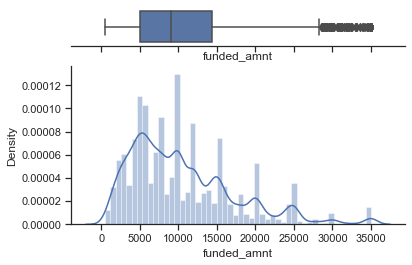

In [47]:
sns.set(style="ticks")

x = newLoanInfo.funded_amnt

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

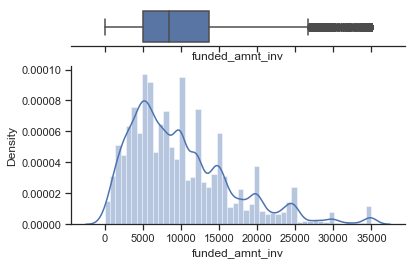

In [48]:
sns.set(style="ticks")

x = newLoanInfo.funded_amnt_inv

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

#### From above distribution graph, it is clear that amount applied by borrower is approved by lending club. So for further analysis we can use ethier one of variable and ommit other two variables.

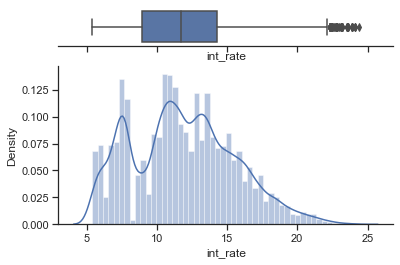

In [49]:
sns.set(style="ticks")

x = newLoanInfo.int_rate

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [50]:
newLoanInfo['intrest_rate_bin'] = pd.cut(newLoanInfo.int_rate,8,
       labels= ['5 to 7.5','7.5 to 10', '10 to 12.5',
                '12.5 to 15','15 to 17.5','17.5 to 20',
                '20 to 22.5','greater than 25'])
newLoanInfo['intrest_rate_bin'].value_counts()

10 to 12.5         9202
12.5 to 15         7820
5 to 7.5           6488
7.5 to 10          5440
15 to 17.5         5038
17.5 to 20         1948
20 to 22.5          741
greater than 25     137
Name: intrest_rate_bin, dtype: int64

#### From above analysis, most of loan rate interest line between 5% - 17.5%

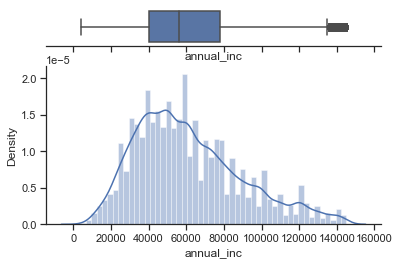

In [51]:
sns.set(style="ticks")

x = newLoanInfo.annual_inc

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [52]:
newLoanInfo.annual_inc.describe()

count    36814.00
mean     61221.16
std      28228.60
min       4000.00
25%      40000.00
50%      56000.00
75%      78000.00
max     145008.00
Name: annual_inc, dtype: float64

In [53]:
newLoanInfo['annual_income_bin'] = pd.cut(newLoanInfo.annual_inc,[0,20000,40000,60000,80000,100000,120000],
                                          labels=['0 to 20000','20000 to 40000','40000 to 60000','60000 to 80000','80000 to 10000','greater than 120000'],right=True)
newLoanInfo['annual_income_bin'].value_counts()

40000 to 60000         11263
20000 to 40000          8517
60000 to 80000          7621
80000 to 10000          4513
greater than 120000     2327
0 to 20000              1180
Name: annual_income_bin, dtype: int64

#### From above anlaysis, most of the people annual income lies between 40000 to 80000 who applied for loan and very less people above 120000.

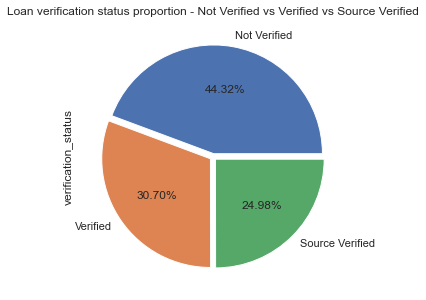

In [54]:
#ploted pie chart to find ratio between verfication status 
fig, ax = plt.subplots(figsize =(15, 5))

newLoanInfo.verification_status.value_counts().plot.pie(autopct="%.2f%%",explode=[0.03]*3)
ax.set_title("Loan verification status proportion - Not Verified vs Verified vs Source Verified")
plt.show()

#### 44.33% of applicants income source are not verified

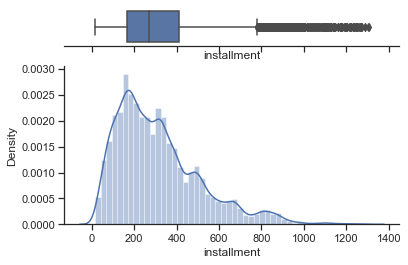

In [55]:
sns.set(style="ticks")

x = newLoanInfo.installment

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

In [56]:
newLoanInfo.installment.describe()

count   36814.00
mean      312.60
std       199.81
min        15.69
25%       163.31
50%       271.14
75%       409.70
max      1305.19
Name: installment, dtype: float64

In [57]:
newLoanInfo['installment_bin'] = pd.cut(newLoanInfo.installment,[0,50,100,150,200,400,600,800,1000],
                                        labels=['0 to 50','50 to 100','100 to 150','150 to 200','200 to 400','400 to 600','600 to 800', 'above 1000'])
newLoanInfo['installment_bin'].value_counts()

200 to 400    14261
400 to 600     6169
150 to 200     5239
100 to 150     3697
50 to 100      3100
600 to 800     2307
above 1000     1054
0 to 50         826
Name: installment_bin, dtype: int64

#### From above analysis, most of loan installment range lies between 150 to 400.

<AxesSubplot:xlabel='issue_month'>

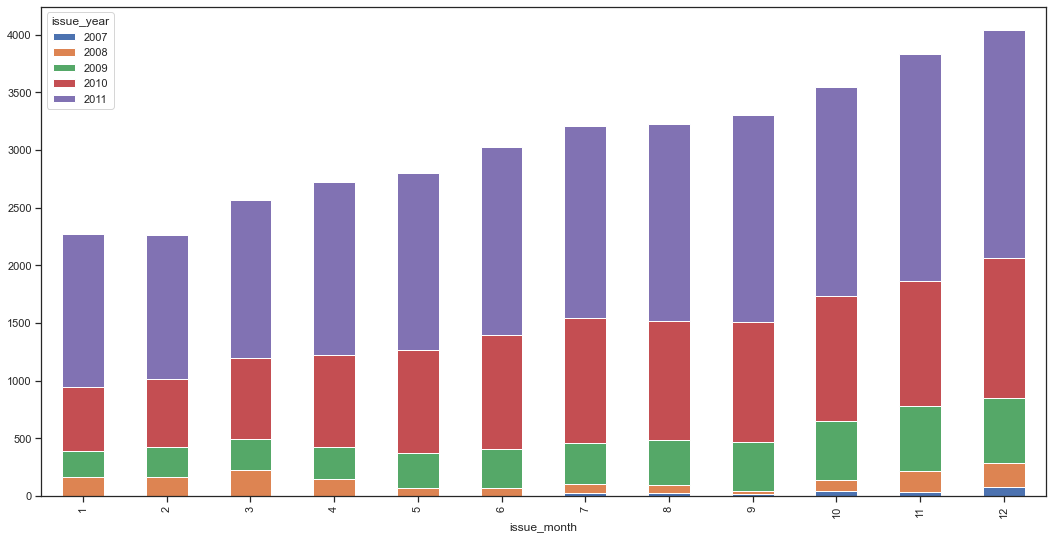

In [58]:
newLoanInfo.groupby(['issue_month','issue_year'])['id'].count().sort_values(ascending = False).unstack().plot(kind='bar', stacked = True,figsize=(18,9))

#### From above graph, 2011 December was the most loan issued and 2007 was least loan issued. It is clear that 2011 has linear growth in loan issued.

<AxesSubplot:xlabel='grade'>

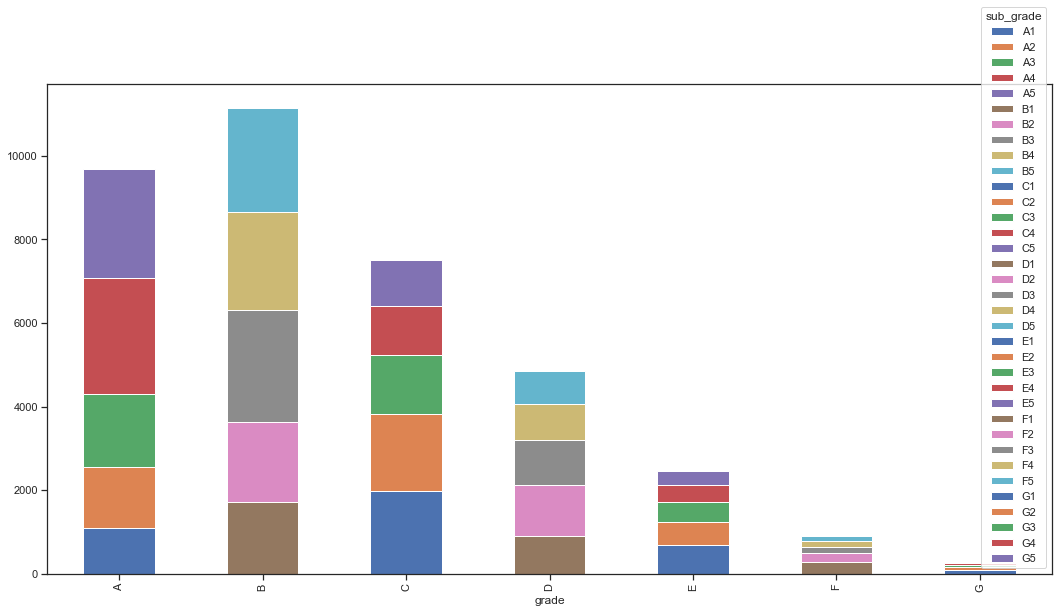

In [59]:
newLoanInfo.groupby(['grade','sub_grade'])['id'].count().sort_values(
    ascending = False).unstack().plot(kind='bar', stacked = True,figsize=(18,9))

#### From above graph, most of applicants fall under B grade and very few fall under G grade.

In [ ]:
newLoanInfo['loan_amt_bin'] = pd.cut(newLoanInfo.loan_amnt,[0,7500,15000,22500,30000,37500],labels = ['0-7500','7500-15000','15000-22500','22500-30000','30000+'])

### Bivariate Analysis

In [60]:
# work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [61]:
newLoanInfo.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000          4975.00   36 months     10.65   
1  1077430       2500         2500          2500.00   60 months     15.27   
2  1077175       2400         2400          2400.00   36 months     15.96   
3  1076863      10000        10000         10000.00   36 months     13.49   
5  1075269       5000         5000          5000.00   36 months      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   

  verification_status    issue_d  loan_status         purpose addr_state  \
0            Verified 2011-12-01   Fully Paid     credit_card         AZ   
1     Source Verified 2011-12-01  Charged Off             car         GA   
2        Not Verified 2011-12-01   Fully Paid  small_business         IL   
3     Source Verified 2011-12-01   Fully Paid           other         CA   
5     Source Verified 2011-12-01   Fully Paid         wedding         AZ   

    dti  open_acc  pub_rec  pub_rec_bankruptcies  issue_year  issue_month  \
0 27.65         3        0                  0.00        2011           12   
1  1.00         3        0                  0.00        2011           12   
2  8.72         2        0                  0.00        2011           12   
3 20.00        10        0                  0.00        2011           12   
5 11.20         9        0                  0.00        2011           12   

  intrest_rate_bin annual_income_bin installment_bin  
0       10 to 12.5    20000 to 40000      150 to 200  
1       15 to 17.5    20000 to 40000       50 to 100  
2       15 to 17.5        0 to 20000       50 to 100  
3       12.5 to 15    40000 to 60000      200 to 400  
5        7.5 to 10    20000 to 40000      150 to 200

In [86]:
chargeOffData = newLoanInfo[newLoanInfo['loan_status'] == 'Charged Off']
fullyPaidData = newLoanInfo[newLoanInfo['loan_status'] == 'Fully Paid']

<Figure size 1080x720 with 0 Axes>

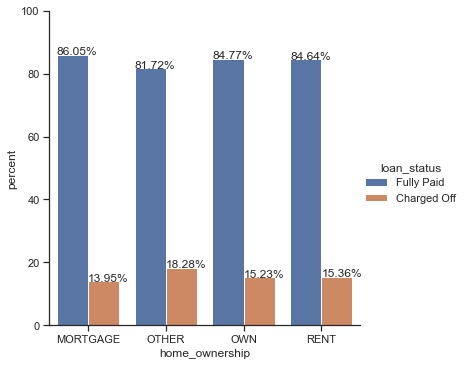

In [87]:
plt.figure(figsize=[15, 10])
x , y = 'home_ownership','loan_status'
df1 = newLoanInfo.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.show()    

In [64]:
#Distribuition of Credit Amount by Housing
fig = {
    "data": [
        {
            "type": 'violin',
            "x": fullyPaidData['home_ownership'],
            "y": fullyPaidData['loan_amnt'],
            "legendgroup": 'Non Default',
            "scalegroup": 'No',
            "name": 'Non Default',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        },
        {
            "type": 'violin',
            "x": chargeOffData['home_ownership'],
            "y": chargeOffData['loan_amnt'],
            "legendgroup": 'Default',
            "scalegroup": 'No',
            "name": 'Default',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'red'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": -1,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'violin/split', validate = False)

<Figure size 432x720 with 0 Axes>

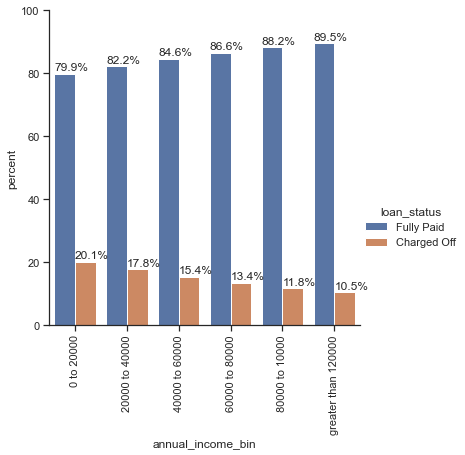

In [65]:
sns.set(style="ticks")
plt.figure(figsize=[6, 10])
x , y = 'annual_income_bin','loan_status'
df1 = newLoanInfo.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, )
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1))+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()+1
    g.ax.text(txt_x,txt_y,txt)

plt.xticks(rotation=90)
plt.show()    

<Figure size 432x720 with 0 Axes>

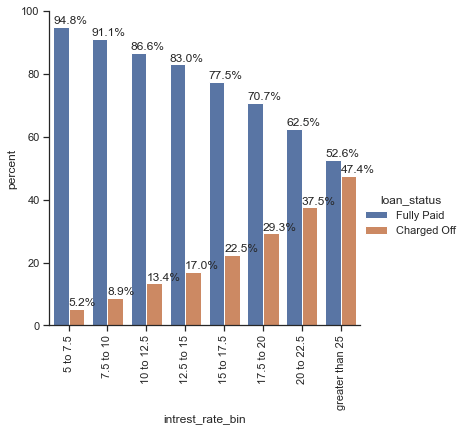

In [71]:
sns.set(style="ticks")
plt.figure(figsize=[6, 10])
x , y = 'intrest_rate_bin','loan_status'
df1 = newLoanInfo.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 )
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1))+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()+1
    g.ax.text(txt_x,txt_y,txt)

plt.xticks(rotation=90)
plt.show()    

In [72]:
import plotly.express as px

def percentage_plot(df, col, target):

    # Creates a temporary dataframe to get the percentages
    temp_df = df.groupby(col)[target].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('Percent').reset_index()
    temp_df['Percent'] = temp_df['Percent'].round(decimals=1)

    # Plot the percentages with the temporary dataframe
    fig = px.bar(temp_df, x=col, y='Percent', color=target, 
                    barmode="group", text='Percent', title=f"Percent {target} By {col}")


    return fig

In [73]:
percentage_plot(newLoanInfo,'annual_income_bin','loan_status')

In [74]:
percentage_plot(newLoanInfo,'purpose','loan_status')

In [70]:
percentage_plot(newLoanInfo,'intrest_rate_bin','loan_status')

In [75]:
percentage_plot(newLoanInfo,'grade','loan_status')

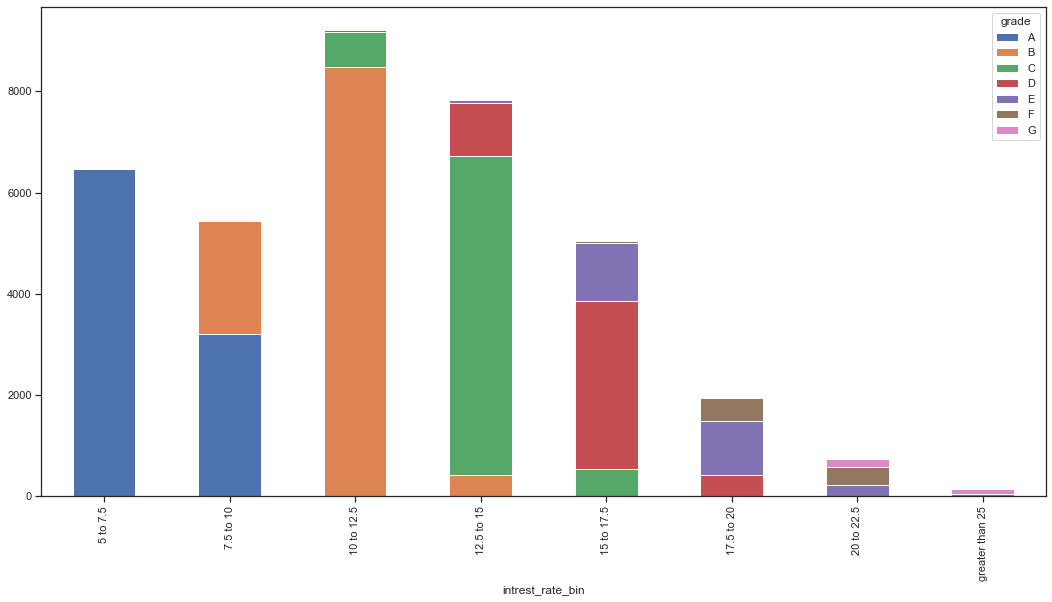

In [76]:
new_df = newLoanInfo.groupby(['intrest_rate_bin','grade'])['intrest_rate_bin'].count().sort_values(ascending = False).unstack().plot(kind='bar', stacked = True,figsize=(18,9))

In [77]:
tr0 = go.Box(
    y=newLoanInfo["int_rate"],
    x=newLoanInfo["grade"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

    
data = [tr0]

layout = go.Layout(
    yaxis=dict(
        title='Interest Rate',
        zeroline=False
    ),
    xaxis=dict(
        title='grade'
    ),
    boxmode='group',

)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(xaxis={'categoryorder':'category ascending'})
py.iplot(fig, filename='box-interest-rate-grade')

In [92]:
tr0 = go.Box(
    y=fullyPaidData["int_rate"],
    x=fullyPaidData["loan_amt_bin"],
    name='Good credit',
    marker=dict(
        color='green'
    )
)

tr1 = go.Box(
    y=chargeOffData["int_rate"],
    x=chargeOffData["loan_amt_bin"],
    name='Charged Off',
    marker=dict(
        color='red'
    )
)

    
data = [tr0,tr1]

layout = go.Layout(
    yaxis=dict(
        title='Interest Rate',
        zeroline=False
    ),
    xaxis=dict(
        title='grade'
    ),
    boxmode='group',

)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='box-interest-rate-grade')

In [80]:
percentage_plot(newLoanInfo,'pub_rec_bankruptcies','loan_status')

In [81]:
percentage_plot(newLoanInfo,'term','loan_status')

In [389]:
newLoanInfo.groupby(['pub_rec','pub_rec','loan_status'])['id'].count()

pub_rec  pub_rec  loan_status
0        0        Charged Off     4972
                  Fully Paid     29819
1        1        Charged Off      449
                  Fully Paid      1520
2        2        Charged Off       10
                  Fully Paid        36
3        3        Fully Paid         6
4        4        Fully Paid         2
Name: id, dtype: int64

In [82]:
pd.cut(newLoanInfo.loan_amnt,[0,7500,15000,22500,30000,37500],labels = ['0-7500','7500-15000','15000-22500','22500-30000','30000+']).value_counts()

0-7500         15071
7500-15000     14086
15000-22500     4704
22500-30000     2403
30000+           550
Name: loan_amnt, dtype: int64

In [93]:

newLoanInfo.loan_amnt.describe()

count   36814.00
mean    10707.22
std      7068.06
min       500.00
25%      5000.00
50%      9250.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64